In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
import xgboost as xgb
from collections import OrderedDict
import gc
from glob import glob
import os
from copy import copy
from time import time
from timeit import default_timer
import pickle

In [4]:
pd.set_option('DISPLAY.MAX_COLUMNS', None)

In [5]:
# combining files into one file containing active and cancelled subscriptions
df_cxls = pd.read_csv('cancelled_subscriptions.csv')
df_active1 = pd.read_csv('Subscriptions w Cancels 202110-202112.csv')
df_active2 = pd.read_csv('Subscriptions w Cancels 202201-202205.csv')
df_active3 = pd.read_csv('Subscriptions w Cancels 202206.csv')

In [6]:
df_cxls.columns

Index(['product_subscription_id', 'product_line_id', 'product_type',
       'ad_market_id', 'ad_market_state_name', 'ad_market_region_name',
       'ad_market_specialty_name', 'customer_id', 'professional_id',
       'contract_length', 'mrr_actual_value', 'order_line_fee_amount_usd',
       'order_line_cancelled_price_amount_usd',
       'order_line_net_price_amount_usd', 'order_line_purchase_date',
       'order_line_cancelled_date', 'Misc Fee Accts', 'YearMonth', 'CPD',
       'label'],
      dtype='object')

In [6]:
df_cxls.dtypes

product_subscription_id                    int64
product_line_id                            int64
product_type                              object
ad_market_id                             float64
ad_market_state_name                      object
ad_market_region_name                     object
ad_market_specialty_name                  object
customer_id                                int64
professional_id                            int64
contract_length                          float64
mrr_actual_value                         float64
order_line_fee_amount_usd                  int64
order_line_cancelled_price_amount_usd    float64
order_line_net_price_amount_usd          float64
order_line_purchase_date                  object
order_line_cancelled_date                 object
Misc Fee Accts                             int64
YearMonth                                  int64
CPD                                      float64
label                                      int64
dtype: object

In [5]:
len(df_cxls)

115383

In [20]:
df_cxls.head()

,product_subscription_id,product_line_id,product_type,ad_market_id,ad_market_state_name,ad_market_region_name,ad_market_specialty_name,customer_id,professional_id,contract_length,mrr_actual_value,order_line_fee_amount_usd,order_line_cancelled_price_amount_usd,order_line_net_price_amount_usd,order_line_purchase_date,order_line_cancelled_date,yearmonth,cpd,label
0,10880593,7,Sponsored Listing,181267.0,Kansas,Osborne County,Bankruptcy & Debt,259419,1775627,3.0,1.0,0,0.0,1.0,4/24/2020,2/28/2021,202102,0.0,1
1,10926229,24,Elite,NaN,NaN,NaN,NaN,335858,4265214,12.0,125.0,0,0.0,125.0,1/8/2021,4/16/2021,202104,0.0,1
2,10914995,7,Sponsored Listing,42502.0,Texas,Nacogdoches County,White Collar Crime,20587,1773270,3.0,1.0,0,0.0,1.0,10/22/2020,1/31/2021,202101,0.0,1
3,10804193,7,Sponsored Listing,780959.0,Georgia,Cobb - West,Spinal Cord Injury,122005,3412614,3.0,1.0,0,0.0,1.0,6/11/2019,3/31/2021,202103,0.0,1
4,10914845,2,Display,701327.0,Florida,Broward County - Northwest,Car Accidents,363299,1273099,12.0,50.0,0,-78.8,-38.8,1/29/2021,5/4/2021,202105,0.0,1


In [7]:
df_active1.columns

Index(['yearmonth', 'product_subscription_id', 'product_line_id',
       'product_type', 'ad_market_id', 'ad_market_state_name',
       'ad_market_region_name', 'ad_market_specialty_name', 'customer_id',
       'professional_id', 'contract_length', 'mrr_actual_value',
       'order_line_fee_amount_usd', 'order_line_cancelled_price_amount_usd',
       'order_line_net_price_amount_usd', 'order_line_purchase_date',
       'order_line_cancelled_date', 'adtype2'],
      dtype='object')

In [13]:
df_active2.columns

Index(['yearmonth', 'product_subscription_id', 'product_line_id',
       'product_type', 'ad_market_id', 'ad_market_state_name',
       'ad_market_region_name', 'ad_market_specialty_name', 'customer_id',
       'professional_id', 'contract_length', 'mrr_actual_value',
       'order_line_fee_amount_usd', 'order_line_cancelled_price_amount_usd',
       'order_line_net_price_amount_usd', 'order_line_purchase_date',
       'order_line_cancelled_date'],
      dtype='object')

In [14]:
df_active3.columns

Index(['yearmonth', 'product_subscription_id', 'product_line_id',
       'product_type', 'ad_market_id', 'ad_market_state_name',
       'ad_market_region_name', 'ad_market_specialty_name', 'customer_id',
       'professional_id', 'contract_length', 'mrr_actual_value',
       'order_line_fee_amount_usd', 'order_line_cancelled_price_amount_usd',
       'order_line_net_price_amount_usd', 'order_line_purchase_date',
       'order_line_cancelled_date'],
      dtype='object')

In [19]:
df_active1.dtypes

yearmonth                                  int64
product_subscription_id                    int64
product_line_id                            int64
product_type                              object
ad_market_id                             float64
ad_market_state_name                      object
ad_market_region_name                     object
ad_market_specialty_name                  object
customer_id                                int64
professional_id                            int64
contract_length                          float64
mrr_actual_value                         float64
order_line_fee_amount_usd                float64
order_line_cancelled_price_amount_usd    float64
order_line_net_price_amount_usd          float64
order_line_purchase_date                  object
order_line_cancelled_date                 object
dtype: object

In [6]:
# drop columns 'Misc Fee Accts' from df_cxl and drop 'adtype2' column from active subscription df's
# as they are neither present in both cxled and active files
df_cxls.drop('Misc Fee Accts', axis=1, inplace=True)
df_active1.drop('adtype2', axis=1, inplace=True)
df_active2.drop('adtype2', axis=1, inplace=True)
df_active3.drop('adtype2', axis=1, inplace=True)

In [7]:
def lower_cols(df):
    df.columns = [x.lower() for x in df.columns]

frames = [df_cxls, df_active1, df_active2, df_active3]

for df in frames:
    lower_cols(df)

In [8]:
# active subscription df's do not have the CPD or Calls per Dollar column, add in dummy 0's in case we get it later
active_frames = [df_active1, df_active2, df_active3]
df_active = pd.concat(active_frames)
df_active['cpd'] = 0.0

In [9]:
len(df_active)

2109244

In [10]:
# add in label column (cancelled_subscriptions csv already manually added label column)
# 1 for cancelled, 0 for active
df_active['label'] = 0

In [11]:
df_active.head()

,yearmonth,product_subscription_id,product_line_id,product_type,ad_market_id,ad_market_state_name,ad_market_region_name,ad_market_specialty_name,customer_id,professional_id,contract_length,mrr_actual_value,order_line_fee_amount_usd,order_line_cancelled_price_amount_usd,order_line_net_price_amount_usd,order_line_purchase_date,order_line_cancelled_date,cpd,label
0,202110,9171882,7,Sponsored Listing,749030.0,Washington,Pierce - Tacoma,DUI & DWI,95,26735,12.0,246.57,0.0,0.0,246.57,2020-05-08,-1,0.0,0
1,202110,9093512,7,Sponsored Listing,700982.0,Florida,Broward County - Central,White Collar Crime,100,1247973,12.0,3.55,0.0,0.0,3.55,2014-10-23,-1,0.0,0
2,202110,9093522,7,Sponsored Listing,701717.0,Florida,Broward County - South,Federal Crime,100,1247973,12.0,12.13,0.0,0.0,12.13,2014-10-23,-1,0.0,0
3,202110,9093517,7,Sponsored Listing,701324.0,Florida,Broward County - Northwest,Criminal Defense,100,1247973,12.0,243.43,0.0,0.0,243.43,2014-10-23,-1,0.0,0
4,202110,10207281,7,Sponsored Listing,748127.0,Michigan,Oakland - South,DUI & DWI,184,737785,12.0,608.00,0.0,0.0,608.00,2015-06-30,-1,0.0,0


In [12]:
# remove all cancelled subscriptions from the active df b/c we already have a bigger file containing more cxls
df_active = df_active[df_active['order_line_cancelled_date'] == '-1']
len(df_active)

2045207

In [13]:
# now we are ready to combine the df_cxls df and the df_active df
df = pd.concat([df_cxls, df_active])
len(df)

2160590

In [14]:
df.tail()

,product_subscription_id,product_line_id,product_type,ad_market_id,ad_market_state_name,ad_market_region_name,ad_market_specialty_name,customer_id,professional_id,contract_length,mrr_actual_value,order_line_fee_amount_usd,order_line_cancelled_price_amount_usd,order_line_net_price_amount_usd,order_line_purchase_date,order_line_cancelled_date,yearmonth,cpd,label
215845,10993788,24,Elite,NaN,NaN,NaN,NaN,47541,4008775,6.0,125.0,0.0,0.0,125.0,2022-03-24,-1,202206,0.0,0
215846,10995196,23,Advanced,NaN,NaN,NaN,NaN,388776,1482702,12.0,108.0,0.0,0.0,108.0,2022-03-30,-1,202206,0.0,0
215847,10983043,26,Profile,NaN,NaN,NaN,NaN,28291,261881,3.0,75.0,0.0,0.0,75.0,2022-03-22,-1,202206,0.0,0
215848,10994433,24,Elite,NaN,NaN,NaN,NaN,170531,1293687,12.0,100.0,0.0,0.0,100.0,2022-03-28,-1,202206,0.0,0
215849,10990935,26,Profile,NaN,NaN,NaN,NaN,6141,3343910,12.0,75.0,0.0,0.0,75.0,2022-03-22,-1,202206,0.0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160590 entries, 0 to 215849
Data columns (total 19 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   product_subscription_id                int64  
 1   product_line_id                        int64  
 2   product_type                           object 
 3   ad_market_id                           float64
 4   ad_market_state_name                   object 
 5   ad_market_region_name                  object 
 6   ad_market_specialty_name               object 
 7   customer_id                            int64  
 8   professional_id                        int64  
 9   contract_length                        float64
 10  mrr_actual_value                       float64
 11  order_line_fee_amount_usd              float64
 12  order_line_cancelled_price_amount_usd  float64
 13  order_line_net_price_amount_usd        float64
 14  order_line_purchase_date               object 
 15 

In [16]:
# check for nulls
df.isnull().sum()

product_subscription_id                       0
product_line_id                               0
product_type                                  0
ad_market_id                             109243
ad_market_state_name                     109243
ad_market_region_name                    109243
ad_market_specialty_name                 109243
customer_id                                   0
professional_id                               0
contract_length                            5039
mrr_actual_value                            794
order_line_fee_amount_usd                     0
order_line_cancelled_price_amount_usd         0
order_line_net_price_amount_usd               0
order_line_purchase_date                      0
order_line_cancelled_date                     0
yearmonth                                     0
cpd                                           0
label                                         0
dtype: int64

In [85]:
# check % of null values in each column
def perc_nulls(df, col):
    perc_of_nulls = str((df.isnull().sum()/df.shape[0]*100)[col])
    print(col + ':' + ' ' + perc_of_nulls + '%')
    
perc_nulls(df, 'ad_market_id')
perc_nulls(df, 'contract_length')
perc_nulls(df, 'mrr_actual_value')

ad_market_id: 5.056165214131325%
contract_length: 0.23322333251565544%
mrr_actual_value: 0.03674922127752142%


In [87]:
df.head()

,product_subscription_id,product_line_id,product_type,ad_market_id,ad_market_state_name,ad_market_region_name,ad_market_specialty_name,customer_id,professional_id,contract_length,mrr_actual_value,order_line_fee_amount_usd,order_line_cancelled_price_amount_usd,order_line_net_price_amount_usd,order_line_purchase_date,order_line_cancelled_date,yearmonth,cpd,label
0,10880593,7,Sponsored Listing,181267.0,Kansas,Osborne County,Bankruptcy & Debt,259419,1775627,3.0,1.0,0.0,0.0,1.0,4/24/2020,2/28/2021,202102,0.0,1
1,10926229,24,Elite,NaN,NaN,NaN,NaN,335858,4265214,12.0,125.0,0.0,0.0,125.0,1/8/2021,4/16/2021,202104,0.0,1
2,10914995,7,Sponsored Listing,42502.0,Texas,Nacogdoches County,White Collar Crime,20587,1773270,3.0,1.0,0.0,0.0,1.0,10/22/2020,1/31/2021,202101,0.0,1
3,10804193,7,Sponsored Listing,780959.0,Georgia,Cobb - West,Spinal Cord Injury,122005,3412614,3.0,1.0,0.0,0.0,1.0,6/11/2019,3/31/2021,202103,0.0,1
4,10914845,2,Display,701327.0,Florida,Broward County - Northwest,Car Accidents,363299,1273099,12.0,50.0,0.0,-78.8,-38.8,1/29/2021,5/4/2021,202105,0.0,1


In [88]:
# let's check categorical columns and check counts of each category in each column
cat_cols = ['product_type', 'ad_market_specialty_name']

# Printing the count of each unique value in each column
for column in cat_cols:
    print(df[column].value_counts(normalize=True))
    print("-" * 40)

Sponsored Listing          0.803049
Display                    0.145833
Profile                    0.022073
Elite                      0.015895
Pro                        0.005718
Website                    0.003707
Advanced                   0.002082
Ad placement               0.001455
Other                      0.000166
HomePage                   0.000011
Martindale Base Profile    0.000006
Complete Profile Plus      0.000006
Name: product_type, dtype: float64
----------------------------------------
Divorce & Separation             0.038896
Personal Injury                  0.033892
Car Accidents                    0.032742
Criminal Defense                 0.031860
Family                           0.027823
                                   ...   
Life Sciences & Biotechnology    0.000175
Telecommunications               0.000141
Project Finance                  0.000131
Native Peoples Law               0.000095
Constitutional                   0.000081
Name: ad_market_specialty_name

In [15]:
# how many unique customers and professionals?
print(df['customer_id'].nunique())
print(df['professional_id'].nunique())

22338
24226


In [19]:
# how many active customers and cxled customers?
active_custs = df[df['label']==0]
print(active_custs['customer_id'].nunique())
cxled_custs = df[df['label']==1]
print(cxled_custs['customer_id'].nunique())

18867
10929


In [16]:
# converting object columns to dates
# also modifying the date columns as the active and cxled customer date columns are of mixed formats
df['order_line_purchase_date'] = pd.to_datetime(df['order_line_purchase_date'])

In [17]:
df['order_line_cancelled_date'] = df['order_line_cancelled_date'].replace('-1', '2022-06-13')
df['order_line_cancelled_date'] = pd.to_datetime(df['order_line_cancelled_date'])

In [18]:
df['contract_length'] = df['order_line_cancelled_date'] - df['order_line_purchase_date']

In [19]:
len(df)

2160590

In [24]:
df.dtypes

product_subscription_id                            int64
product_line_id                                    int64
product_type                                      object
ad_market_id                                     float64
ad_market_state_name                              object
ad_market_region_name                             object
ad_market_specialty_name                          object
customer_id                                        int64
professional_id                                    int64
contract_length                          timedelta64[ns]
mrr_actual_value                                 float64
order_line_fee_amount_usd                        float64
order_line_cancelled_price_amount_usd            float64
order_line_net_price_amount_usd                  float64
order_line_purchase_date                  datetime64[ns]
order_line_cancelled_date                 datetime64[ns]
yearmonth                                          int64
cpd                            

In [20]:
df = df.sort_values(['customer_id', 'order_line_purchase_date'], ascending=[True, True])

In [26]:
df.head(20)

,product_subscription_id,product_line_id,product_type,ad_market_id,ad_market_state_name,ad_market_region_name,ad_market_specialty_name,customer_id,professional_id,contract_length,mrr_actual_value,order_line_fee_amount_usd,order_line_cancelled_price_amount_usd,order_line_net_price_amount_usd,order_line_purchase_date,order_line_cancelled_date,yearmonth,cpd,label
22315,10345347,4,Pro,NaN,NaN,NaN,NaN,5,4732116,1851 days,0.0,0.0,0.0,0.0,2016-02-04,2021-02-28,202102,0.0,1
4990,10350730,4,Pro,NaN,NaN,NaN,NaN,5,129251,1838 days,0.0,0.0,0.0,0.0,2016-02-17,2021-02-28,202102,0.0,1
5336,10069989,7,Sponsored Listing,715527.0,California,Los Angeles County - Westside Cities,Bankruptcy & Debt,5,169952,971 days,140.0,0.0,0.0,140.0,2018-07-03,2021-02-28,202102,0.0,1
20484,10577788,7,Sponsored Listing,714582.0,California,Los Angeles County - San Fernando,Bankruptcy & Debt,5,169952,971 days,288.0,0.0,0.0,288.0,2018-07-03,2021-02-28,202102,0.0,1
22219,10380000,7,Sponsored Listing,713952.0,California,Los Angeles County - Central Los Angeles,Bankruptcy & Debt,5,169952,971 days,500.0,0.0,0.0,500.0,2018-07-03,2021-02-28,202102,0.0,1
25945,10234071,7,Sponsored Listing,715328.0,California,Los Angeles County - South Bay,Debt Settlement,5,169952,971 days,25.0,0.0,0.0,25.0,2018-07-03,2021-02-28,202102,0.0,1
30845,10234072,7,Sponsored Listing,714068.0,California,Los Angeles County - Central Los Angeles,Debt Settlement,5,169952,971 days,34.0,0.0,0.0,34.0,2018-07-03,2021-02-28,202102,0.0,1
33465,10069987,7,Sponsored Listing,714897.0,California,Los Angeles County - San Gabriel,Bankruptcy & Debt,5,169952,971 days,162.0,0.0,0.0,162.0,2018-07-03,2021-02-28,202102,0.0,1
34968,9287684,7,Sponsored Listing,714582.0,California,Los Angeles County - San Fernando,Bankruptcy & Debt,5,169952,971 days,320.0,0.0,0.0,320.0,2018-07-03,2021-02-28,202102,0.0,1
16182,9287683,7,Sponsored Listing,714267.0,California,Los Angeles County - Gateway Cities,Bankruptcy & Debt,5,169952,613 days,265.0,0.0,0.0,265.0,2019-06-26,2021-02-28,202102,0.0,1


In [21]:
# using new file for calls and MRR
calls_mrr_df = pd.read_csv(r'Corrected Calls Per Dollar For Brian.csv')

In [22]:
calls_mrr_df.dtypes

cpd_cust              int64
cpd_yearmonth         int64
sum(b.calls)          int64
cpd_mrr             float64
calls_per_dollar    float64
dtype: object

In [23]:
calls_mrr_df  = calls_mrr_df.rename(columns={'cpd_cust': 'customer_id', 'cpd_yearmonth':'yearmonth'})

In [24]:
calls_mrr_df  = calls_mrr_df.rename(columns={'sum(b.calls)': 'calls'})

In [25]:
df = df.merge(calls_mrr_df, on=['customer_id', 'yearmonth'], how='left')

In [33]:
df.head(10)

,product_subscription_id,product_line_id,product_type,ad_market_id,ad_market_state_name,ad_market_region_name,ad_market_specialty_name,customer_id,professional_id,contract_length,mrr_actual_value,order_line_fee_amount_usd,order_line_cancelled_price_amount_usd,order_line_net_price_amount_usd,order_line_purchase_date,order_line_cancelled_date,yearmonth,cpd,label,calls,cpd_mrr,calls_per_dollar
0,10345347,4,Pro,NaN,NaN,NaN,NaN,5,4732116,1851 days,0.0,0.0,0.0,0.0,2016-02-04,2021-02-28,202102,0.0,1,0.0,2018.0,0.0
1,10350730,4,Pro,NaN,NaN,NaN,NaN,5,129251,1838 days,0.0,0.0,0.0,0.0,2016-02-17,2021-02-28,202102,0.0,1,0.0,2018.0,0.0
2,10069989,7,Sponsored Listing,715527.0,California,Los Angeles County - Westside Cities,Bankruptcy & Debt,5,169952,971 days,140.0,0.0,0.0,140.0,2018-07-03,2021-02-28,202102,0.0,1,0.0,2018.0,0.0
3,10577788,7,Sponsored Listing,714582.0,California,Los Angeles County - San Fernando,Bankruptcy & Debt,5,169952,971 days,288.0,0.0,0.0,288.0,2018-07-03,2021-02-28,202102,0.0,1,0.0,2018.0,0.0
4,10380000,7,Sponsored Listing,713952.0,California,Los Angeles County - Central Los Angeles,Bankruptcy & Debt,5,169952,971 days,500.0,0.0,0.0,500.0,2018-07-03,2021-02-28,202102,0.0,1,0.0,2018.0,0.0
5,10234071,7,Sponsored Listing,715328.0,California,Los Angeles County - South Bay,Debt Settlement,5,169952,971 days,25.0,0.0,0.0,25.0,2018-07-03,2021-02-28,202102,0.0,1,0.0,2018.0,0.0
6,10234072,7,Sponsored Listing,714068.0,California,Los Angeles County - Central Los Angeles,Debt Settlement,5,169952,971 days,34.0,0.0,0.0,34.0,2018-07-03,2021-02-28,202102,0.0,1,0.0,2018.0,0.0
7,10069987,7,Sponsored Listing,714897.0,California,Los Angeles County - San Gabriel,Bankruptcy & Debt,5,169952,971 days,162.0,0.0,0.0,162.0,2018-07-03,2021-02-28,202102,0.0,1,0.0,2018.0,0.0
8,9287684,7,Sponsored Listing,714582.0,California,Los Angeles County - San Fernando,Bankruptcy & Debt,5,169952,971 days,320.0,0.0,0.0,320.0,2018-07-03,2021-02-28,202102,0.0,1,0.0,2018.0,0.0
9,9287683,7,Sponsored Listing,714267.0,California,Los Angeles County - Gateway Cities,Bankruptcy & Debt,5,169952,613 days,265.0,0.0,0.0,265.0,2019-06-26,2021-02-28,202102,0.0,1,0.0,2018.0,0.0


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
product_subscription_id,2160590.0,10390360.606698,638274.734286,-1.0,10165041.0,10648799.0,10888593.0,11001860.0
product_line_id,2160590.0,7.038848,4.16958,-1.0,7.0,7.0,7.0,28.0
ad_market_id,2051347.0,232522.02582,258009.928601,4.0,44809.0,123434.0,292615.0,798350.0
customer_id,2160590.0,74788.438414,108848.211215,5.0,10445.0,28798.0,57698.0,390243.0
professional_id,2160590.0,1879459.235244,1581622.176791,-1.0,561409.0,1463253.0,3343135.0,5232835.0
contract_length,2160590,1581 days 01:27:51.040225104,1017 days 23:59:19.336668112,0 days 00:00:00,686 days 00:00:00,1504 days 00:00:00,2510 days 00:00:00,4624 days 00:00:00
mrr_actual_value,2159796.0,25.068573,71.733953,0.0,1.0,1.09,14.14,4501.26
order_line_fee_amount_usd,2160590.0,0.427458,62.385243,-4.0,0.0,0.0,0.0,26354.13
order_line_cancelled_price_amount_usd,2160590.0,-0.081066,3.608968,-2086.56,0.0,0.0,0.0,0.8
order_line_net_price_amount_usd,2160590.0,24.068841,92.708396,-273.54,1.0,1.03,12.0,26354.13


In [26]:
# creating new df and creating new features to get overall spend and total calls by a customer

# total spending by a customer
df_groupby = df.groupby(['customer_id', 'contract_length', 'product_type', 'ad_market_specialty_name', 'label']).agg({'calls': 'sum', 'cpd_mrr': 'sum'}).reset_index()
df_groupby = df_groupby.rename(columns={'cpd_mrr': 'total_spend', 'calls': 'total_calls'})


# creating new features to get average (mean) mrr and average calls per month by a customer

# average mrr and avg. calls per month received by a customer
df_groupby2 = df.groupby(['customer_id', 'contract_length', 'product_type', 'ad_market_specialty_name', 'label']).agg({'calls': 'mean', 'cpd_mrr': 'mean', 'calls_per_dollar': 'mean'}).reset_index()
df_groupby2 = df_groupby2.rename(columns={'cpd_mrr': 'avg_mrr', 'calls': 'avg_calls_per_month'})

In [27]:
df_groupby.head()

,customer_id,contract_length,product_type,ad_market_specialty_name,label,total_calls,total_spend
0,5,613 days,Sponsored Listing,Bankruptcy & Debt,1,0.0,4036.0
1,5,971 days,Sponsored Listing,Bankruptcy & Debt,1,0.0,10090.0
2,5,971 days,Sponsored Listing,Debt Settlement,1,0.0,4036.0
3,7,1697 days,Sponsored Listing,Criminal Defense,0,72.0,4726.0
4,7,1697 days,Sponsored Listing,DUI & DWI,0,72.0,4726.0


In [37]:
df_groupby2.head()

,customer_id,contract_length,product_type,ad_market_specialty_name,label,avg_calls_per_month,avg_mrr,calls_per_dollar
0,5,613 days,Sponsored Listing,Bankruptcy & Debt,1,0.0,2018.00,0.000000
1,5,971 days,Sponsored Listing,Bankruptcy & Debt,1,0.0,2018.00,0.000000
2,5,971 days,Sponsored Listing,Debt Settlement,1,0.0,2018.00,0.000000
3,7,1697 days,Sponsored Listing,Criminal Defense,0,9.0,590.75,0.015228
4,7,1697 days,Sponsored Listing,DUI & DWI,0,9.0,590.75,0.015228


In [28]:
df_final1 = df_groupby.merge(df_groupby2, 
                             on=['customer_id', 'contract_length', 'product_type', 'ad_market_specialty_name', 'label'], 
                             how='left')

In [29]:
df_final1 = df_final1.sort_values(['customer_id', 'label'], ascending=[True, False])

In [30]:
df_final1.dtypes

customer_id                           int64
contract_length             timedelta64[ns]
product_type                         object
ad_market_specialty_name             object
label                                 int64
total_calls                         float64
total_spend                         float64
avg_calls_per_month                 float64
avg_mrr                             float64
calls_per_dollar                    float64
dtype: object

In [85]:
len(df_final1)

121924

In [31]:
# how many active subscriptions and cxled subscriptions?
df_final1['label'].value_counts()  # it is slightly imbalanced with a 2:1 ratio but should be okay

0    84360
1    37564
Name: label, dtype: int64

In [62]:
df_final1.head(50)

,customer_id,contract_length,product_type,ad_market_specialty_name,label,total_calls,total_spend,avg_calls_per_month,avg_mrr,calls_per_dollar
0,5,613 days,Sponsored Listing,Bankruptcy & Debt,1,0.0,4036.00,0.000,2018.00,0.000000
1,5,971 days,Sponsored Listing,Bankruptcy & Debt,1,0.0,10090.00,0.000,2018.00,0.000000
2,5,971 days,Sponsored Listing,Debt Settlement,1,0.0,4036.00,0.000,2018.00,0.000000
3,7,1697 days,Sponsored Listing,Criminal Defense,0,72.0,4726.00,9.000,590.75,0.015228
4,7,1697 days,Sponsored Listing,DUI & DWI,0,72.0,4726.00,9.000,590.75,0.015228
5,7,2135 days,Sponsored Listing,Criminal Defense,0,72.0,4726.00,9.000,590.75,0.015228
6,7,2478 days,Sponsored Listing,Criminal Defense,0,72.0,4726.00,9.000,590.75,0.015228
7,7,2478 days,Sponsored Listing,DUI & DWI,0,72.0,4726.00,9.000,590.75,0.015228
8,8,204 days,Display,Foreclosure,1,6.0,489.00,6.000,489.00,0.012270
9,8,465 days,Sponsored Listing,Foreclosure,0,150.0,12764.00,9.375,797.75,0.011795


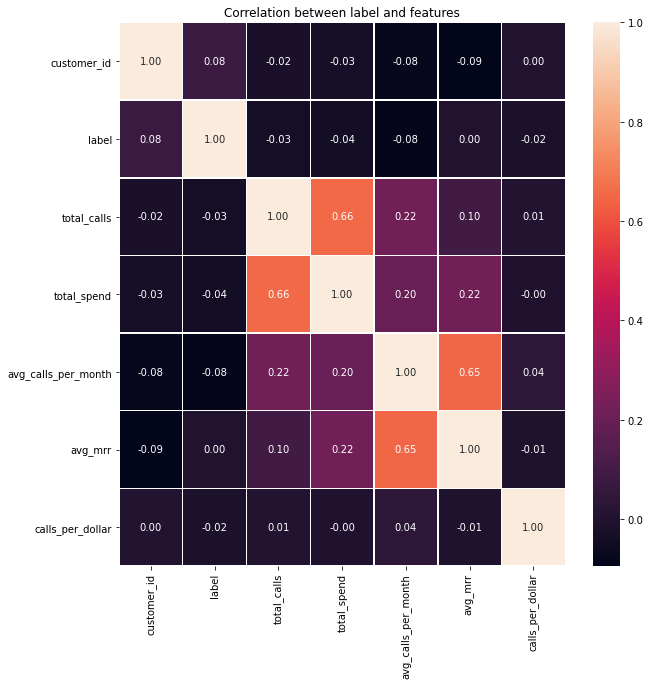

In [32]:
corr=df_final1.corr()

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.title('Correlation between label and features')
plt.show()

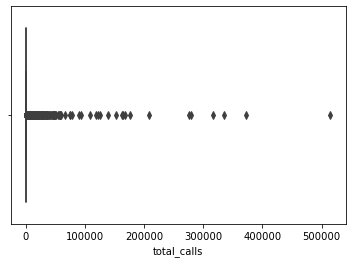

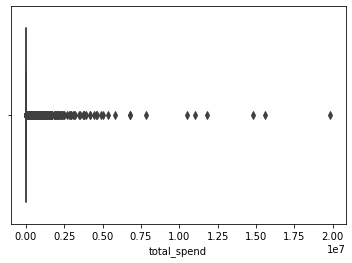

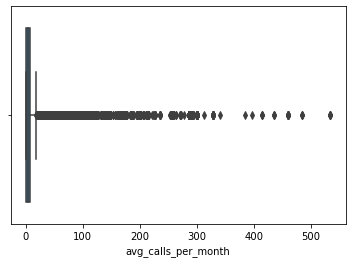

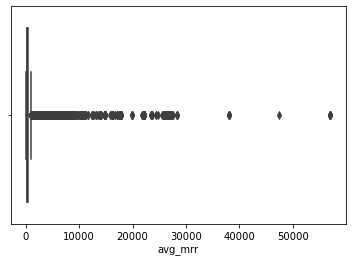

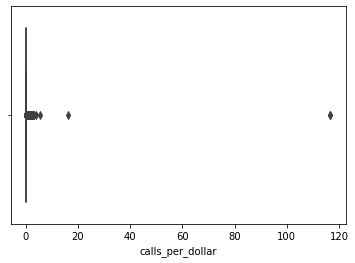

In [48]:
cols=['total_calls','total_spend','avg_calls_per_month', 'avg_mrr', 'calls_per_dollar']

for i in cols:
    sns.boxplot(x=df_final1[i])
    plt.show()

In [49]:
df_final1.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,121924.0,89338.501197,117075.423938,5.0,15587.0,36771.0,87926.0,390225.0
contract_length,121924,1335 days 10:21:44.839080080,923 days 03:06:54.717180448,0 days 00:00:00,509 days 00:00:00,1209 days 00:00:00,2086 days 00:00:00,4624 days 00:00:00
label,121924.0,0.308094,0.461707,0.0,0.0,0.0,1.0,1.0
total_calls,121924.0,177.041288,3149.361371,0.0,3.0,24.0,75.0,514764.0
total_spend,121924.0,9456.199971,130263.760294,0.0,585.0,1531.0,4150.0,19837048.86
avg_calls_per_month,119710.0,7.831389,19.469969,0.0,1.0,3.5,8.0,534.0
avg_mrr,119710.0,562.719796,1556.230166,0.24,128.9,226.0,458.75,57043.04
calls_per_dollar,119710.0,0.024464,0.481636,0.0,0.003718,0.012396,0.027979,116.666667


There are many outliers in all of our features.  Calculating the upper whisker and removing records if they are an outlier

In [33]:
#Calculating the upper whisker of the box plot for the total_calls variable

Q1 = df_final1.quantile(q=0.25) 
Q3 = df_final1.quantile(q=0.75) 
IQR = Q3 - Q1

# Upper Whisker of boxplot
upper_whisker = (Q3 + 1.5*IQR)['total_calls']   
print(upper_whisker)

183.0


In [34]:
len(df_final1)

121924

In [35]:
df_final1 = df_final1[df_final1['total_calls'] <= upper_whisker]
len(df_final1)

108622

In [36]:
#Calculating the upper whisker of the box plot for the total_spend variable

Q1 = df_final1.quantile(q=0.25) 
Q3 = df_final1.quantile(q=0.75) 
IQR = Q3 - Q1

# Upper Whisker of boxplot
upper_whisker = (Q3 + 1.5*IQR)['total_spend']   
print(upper_whisker)

6684.8


In [37]:
df_final1 = df_final1[df_final1['total_spend'] <= upper_whisker]
len(df_final1)

98334

In [38]:
#Calculating the upper whisker of the box plot for the avg_calls_per_month variable

Q1 = df_final1.quantile(q=0.25) 
Q3 = df_final1.quantile(q=0.75) 
IQR = Q3 - Q1

# Upper Whisker of boxplot
upper_whisker = (Q3 + 1.5*IQR)['avg_calls_per_month']   
print(upper_whisker)

14.100000000000001


In [39]:
df_final1 = df_final1[df_final1['avg_calls_per_month'] <= upper_whisker]
len(df_final1)

90251

In [40]:
#Calculating the upper whisker of the box plot for the avg_mrr variable

Q1 = df_final1.quantile(q=0.25) 
Q3 = df_final1.quantile(q=0.75) 
IQR = Q3 - Q1

# Upper Whisker of boxplot
upper_whisker = (Q3 + 1.5*IQR)['avg_mrr']   
print(upper_whisker)

615.1500000000001


In [41]:
df_final1 = df_final1[df_final1['avg_mrr'] <= upper_whisker]
len(df_final1)

82837

In [42]:
#Calculating the upper whisker of the box plot for the calls_per_dollar variable

Q1 = df_final1.quantile(q=0.25) 
Q3 = df_final1.quantile(q=0.75) 
IQR = Q3 - Q1

# Upper Whisker of boxplot
upper_whisker = (Q3 + 1.5*IQR)['calls_per_dollar']   
print(upper_whisker)

0.06238614062499999


In [43]:
df_final1 = df_final1[df_final1['calls_per_dollar'] <= upper_whisker]
len(df_final1)

79613

In [44]:
# Now, after removing outliers, how many active subscriptions and cxled subscriptions?
df_final1['label'].value_counts()  # it is still slightly imbalanced with a 2:1 ratio but should be okay

0    51995
1    27618
Name: label, dtype: int64

In [99]:
# Now, after removing outliers, how many active customers and cxled customers?
active_custs = df_final1[df_final1['label']==0]
print(active_custs['customer_id'].nunique())
cxled_custs = df_final1[df_final1['label']==1]
print(cxled_custs['customer_id'].nunique())

13810
7287


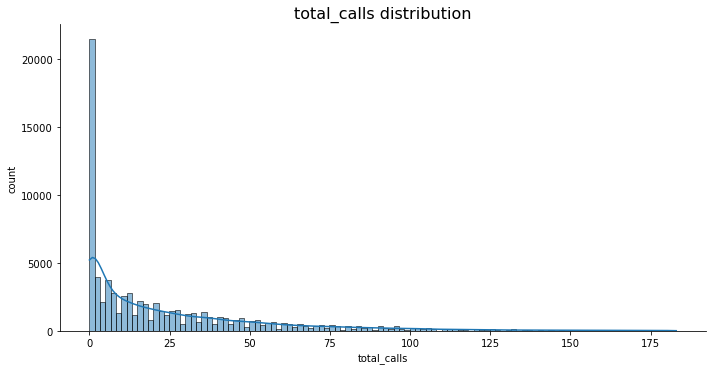

In [101]:
#plotting distribution plot for total_calls

sns.displot(df_final1['total_calls'], kde=True, height=5, aspect=2)
plt.title('total_calls distribution', size=16, )
plt.ylabel('count');

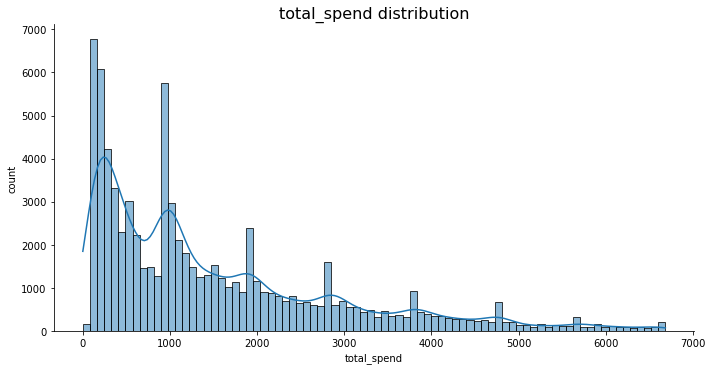

In [102]:
#plotting distribution plot for total_spend

sns.displot(df_final1['total_spend'], kde=True, height=5, aspect=2)
plt.title('total_spend distribution', size=16, )
plt.ylabel('count');

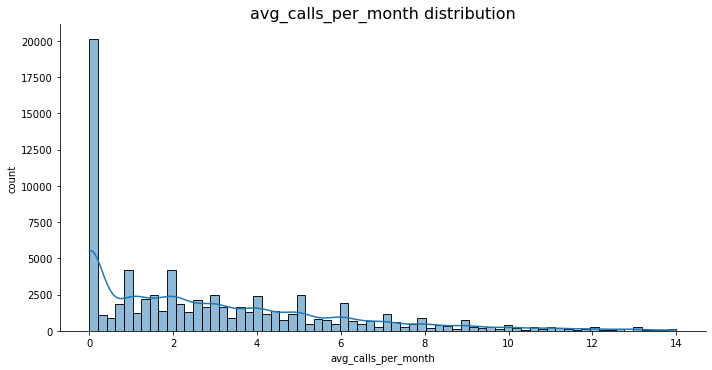

In [103]:
#plotting distribution plot for avg_calls_per_month

sns.displot(df_final1['avg_calls_per_month'], kde=True, height=5, aspect=2)
plt.title('avg_calls_per_month distribution', size=16, )
plt.ylabel('count');

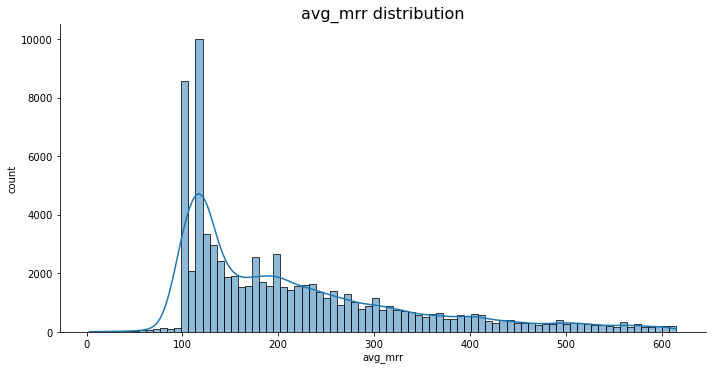

In [104]:
#plotting distribution plot for avg_mrr

sns.displot(df_final1['avg_mrr'], kde=True, height=5, aspect=2)
plt.title('avg_mrr distribution', size=16, )
plt.ylabel('count');

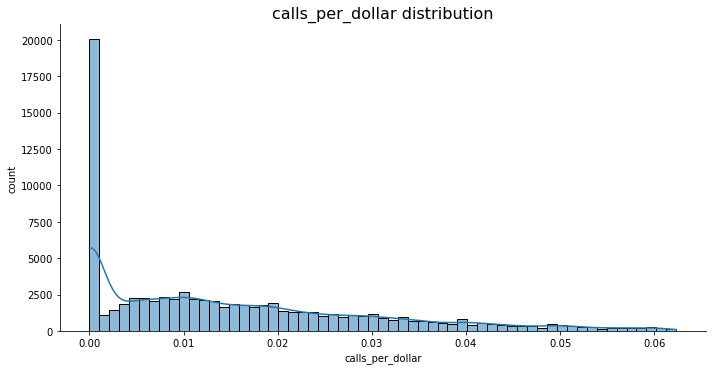

In [105]:
#plotting distribution plot for calls_per_dollar

sns.displot(df_final1['calls_per_dollar'], kde=True, height=5, aspect=2)
plt.title('calls_per_dollar distribution', size=16, )
plt.ylabel('count');

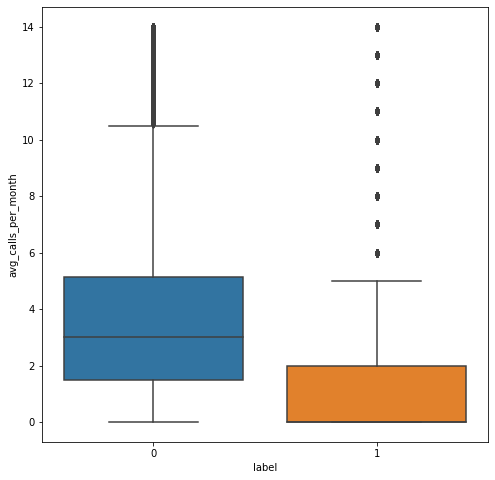

In [108]:
# typical active customers (median of box plot) receive at least 3 calls per month versus cancelled customers who receive 1 or less
plt.figure(figsize=(8,8))
sns.boxplot(x='label', y='avg_calls_per_month', data=df_final1)
plt.show()

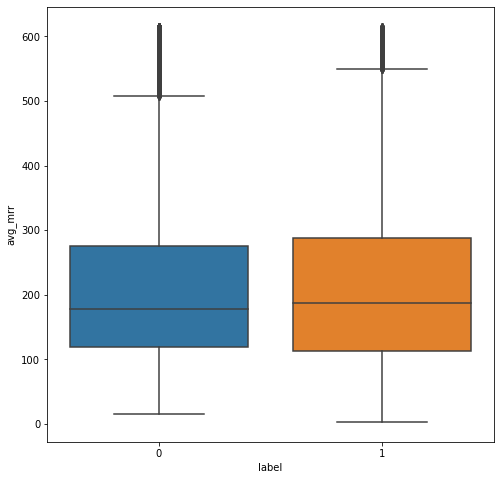

In [109]:
# this shows active and cxled customers both spending the same amount every month and indicates 
# it doesn't matter how much customers spend per month, there are active and cxls in every range of spending
plt.figure(figsize=(8,8))
sns.boxplot(x='label', y='avg_mrr', data=df_final1)
plt.show()

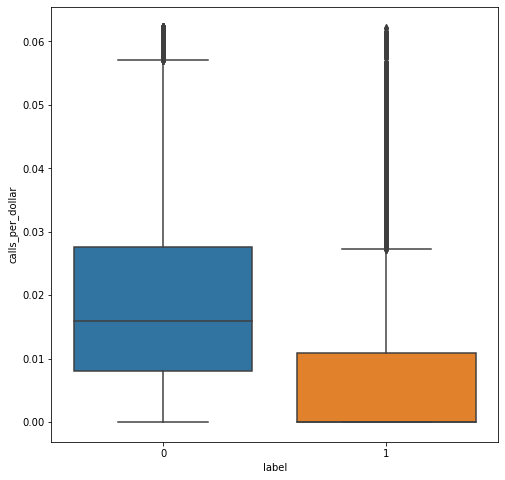

In [110]:
# typical active customers (median of box plot) receive at least 0.015 calls_per_dollar versus cancelled customers who receive close to 0 calls_per_dollar
plt.figure(figsize=(8,8))
sns.boxplot(x='label', y='calls_per_dollar', data=df_final1)
plt.show()

Removing total_calls and total_spend features as active customers obviously spend more and have more calls b/c they are active and keep receiving as time goes on versus cancelled customers who don't receive any more since they cancelled.

Also, contract_length would be biased - active accounts have a higher contract_length versus cancelled accounts who have a shorter contract_length.  Removing this feature too as the model can just focus on these features to predict who is active / cancelled.

In [112]:
df_final1 = df_final1.drop('total_calls', axis=1)

In [113]:
df_final1 = df_final1.drop('total_spend', axis=1)

In [123]:
df_final1 = df_final1.drop('contract_length', axis=1)

In [124]:
len(df_final1)

79613

In [125]:
df_final1.dtypes

customer_id                   int64
product_type                 object
ad_market_specialty_name     object
label                         int64
avg_calls_per_month         float64
avg_mrr                     float64
calls_per_dollar            float64
dtype: object

In [126]:
# check for nulls (there were some nulls earlier, but got removed after removing outliers.  They were less than 5% of population so it's fine)
df_final1.isnull().sum()

customer_id                 0
product_type                0
ad_market_specialty_name    0
label                       0
avg_calls_per_month         0
avg_mrr                     0
calls_per_dollar            0
dtype: int64

In [90]:
## Prep Data for Training and Testing

# let's fill the nulls in with mean values of the column
columns = ['avg_calls_per_month', 'avg_mrr', 'calls_per_dollar']
for col in columns:
    df_final1[col] = df_final1[col].fillna(df_final1[col].mean())

In [127]:
from sklearn.utils import shuffle
df_final1 = shuffle(df_final1)

In [128]:
df_final1.reset_index(drop=True, inplace=True)

In [119]:
# DO NOT NEED
# converting timedelta column to float
# df_final1['contract_length'] = df_final1['contract_length']/np.timedelta64(1, 'D')

In [129]:
# inputting categorical variables into a list and one-hot encoding them
cat_vars = ['product_type', 'ad_market_specialty_name']

# converting categories to unique labels for each category
cat_data = pd.get_dummies(df_final1[cat_vars])

cat_data.head()

,product_type_Ad placement,product_type_Display,product_type_Sponsored Listing,ad_market_specialty_name_Administrative Law,ad_market_specialty_name_Admiralty & Maritime,ad_market_specialty_name_Adoption,ad_market_specialty_name_Advertising,ad_market_specialty_name_Agriculture,ad_market_specialty_name_Alimony,ad_market_specialty_name_Animal & Dog Bites,ad_market_specialty_name_Animal Law,ad_market_specialty_name_Antitrust & Trade Law,ad_market_specialty_name_Appeals,ad_market_specialty_name_Arbitration,ad_market_specialty_name_Asylum,ad_market_specialty_name_Aviation,ad_market_specialty_name_Banking,ad_market_specialty_name_Bankruptcy & Debt,ad_market_specialty_name_Birth Injury,ad_market_specialty_name_Brain Injury,ad_market_specialty_name_Business,ad_market_specialty_name_Cannabis Law,ad_market_specialty_name_Car Accidents,ad_market_specialty_name_Chapter 11 Bankruptcy,ad_market_specialty_name_Chapter 13 Bankruptcy,ad_market_specialty_name_Chapter 7 Bankruptcy,ad_market_specialty_name_Child Abuse,ad_market_specialty_name_Child Custody,ad_market_specialty_name_Child Support,ad_market_specialty_name_Civil Rights,ad_market_specialty_name_Class Action,ad_market_specialty_name_Commercial,ad_market_specialty_name_Communications & Media,ad_market_specialty_name_Computer Fraud,ad_market_specialty_name_Constitutional,ad_market_specialty_name_Construction & Development,ad_market_specialty_name_Consumer Protection,ad_market_specialty_name_Contracts & Agreements,ad_market_specialty_name_Copyright Application,ad_market_specialty_name_Copyright Infringement,ad_market_specialty_name_Corporate & Incorporation,ad_market_specialty_name_Credit Card Fraud,ad_market_specialty_name_Credit Repair,ad_market_specialty_name_Criminal Defense,ad_market_specialty_name_DUI & DWI,ad_market_specialty_name_Debt & Lending Agreements,ad_market_specialty_name_Debt Collection,ad_market_specialty_name_Debt Settlement,ad_market_specialty_name_Defective and Dangerous Products,ad_market_specialty_name_Discrimination,ad_market_specialty_name_Divorce & Separation,ad_market_specialty_name_Domestic Violence,ad_market_specialty_name_Drug Crime,ad_market_specialty_name_Education,ad_market_specialty_name_Elder Law,ad_market_specialty_name_Election Campaigns & Political Law,ad_market_specialty_name_Employee Benefits,ad_market_specialty_name_Employment & Labor,ad_market_specialty_name_Energy & Utilities,ad_market_specialty_name_Entertainment,ad_market_specialty_name_Environmental and Natural Resources,ad_market_specialty_name_Equipment Finance and Leasing,ad_market_specialty_name_Estate Planning,ad_market_specialty_name_Ethics & Professional Responsibility,ad_market_specialty_name_Expungement,ad_market_specialty_name_Family,ad_market_specialty_name_Federal Crime,ad_market_specialty_name_Federal Regulation,ad_market_specialty_name_Financial Markets and Services,ad_market_specialty_name_Foreclosure,ad_market_specialty_name_Franchising,ad_market_specialty_name_Gaming,ad_market_specialty_name_General Practice,ad_market_specialty_name_Government,ad_market_specialty_name_Government Contracts,ad_market_specialty_name_Guardianship,ad_market_specialty_name_Gun Law,ad_market_specialty_name_Health Care,ad_market_specialty_name_Health Insurance,ad_market_specialty_name_Identity Theft,ad_market_specialty_name_Immigration,ad_market_specialty_name_Insurance,ad_market_specialty_name_Insurance Fraud,ad_market_specialty_name_Intellectual Property,ad_market_specialty_name_International Law,ad_market_specialty_name_Internet,ad_market_specialty_name_Juvenile,ad_market_specialty_name_LGBT+ Law,ad_market_specialty_name_Land Use & Zoning,ad_market_specialty_name_Landlord & Tenant,ad_market_specialty_name_Lawsuits & Disputes,ad_market_specialty_name_Lemon Law,ad_market_specialty_name_Libel & Slander,ad_market_specialty_name_Licensing,ad_market_specialty_name_Life Insurance,ad_market_specialty_name_Life Sciences & Biotechnology,ad_market_specialty_name_Limited Liability Company (LLC),ad_market_specia

In [130]:
# retrieving numerical columns by removing the categorical columns from df
numeric_vars = list(set(df_final1.columns.values.tolist()) - set(cat_vars))
numeric_vars.remove('label')
numeric_vars.remove('customer_id')
numeric_data = df_final1[numeric_vars].copy()

numeric_data.head()

,avg_calls_per_month,calls_per_dollar,avg_mrr
0,1.00,0.004098,244.00
1,1.25,0.009821,118.75
2,0.00,0.000000,338.00
3,2.50,0.016881,150.75
4,0.00,0.000000,310.00


In [131]:
# concat the numeric df and the one hot encoded categorical variables df
df_combined = pd.concat([numeric_data, cat_data], axis=1)

# ensure the shape matches up
print(cat_data.shape)
print(numeric_data.shape)
print(df_combined.shape)

(79613, 146)
(79613, 3)
(79613, 149)


In [ ]:
# Gowthami suggestions/feedback:
# Might need more data on paid and organic ads and specialty and products -
# what type of calls and leads
# where is the churn happening in the different ad market specialties?
# how many calls per campaign - which campaign is generating more calls?
# Top performing market for an attorney

In [132]:
df_combined.head(15)

,avg_calls_per_month,calls_per_dollar,avg_mrr,product_type_Ad placement,product_type_Display,product_type_Sponsored Listing,ad_market_specialty_name_Administrative Law,ad_market_specialty_name_Admiralty & Maritime,ad_market_specialty_name_Adoption,ad_market_specialty_name_Advertising,ad_market_specialty_name_Agriculture,ad_market_specialty_name_Alimony,ad_market_specialty_name_Animal & Dog Bites,ad_market_specialty_name_Animal Law,ad_market_specialty_name_Antitrust & Trade Law,ad_market_specialty_name_Appeals,ad_market_specialty_name_Arbitration,ad_market_specialty_name_Asylum,ad_market_specialty_name_Aviation,ad_market_specialty_name_Banking,ad_market_specialty_name_Bankruptcy & Debt,ad_market_specialty_name_Birth Injury,ad_market_specialty_name_Brain Injury,ad_market_specialty_name_Business,ad_market_specialty_name_Cannabis Law,ad_market_specialty_name_Car Accidents,ad_market_specialty_name_Chapter 11 Bankruptcy,ad_market_specialty_name_Chapter 13 Bankruptcy,ad_market_specialty_name_Chapter 7 Bankruptcy,ad_market_specialty_name_Child Abuse,ad_market_specialty_name_Child Custody,ad_market_specialty_name_Child Support,ad_market_specialty_name_Civil Rights,ad_market_specialty_name_Class Action,ad_market_specialty_name_Commercial,ad_market_specialty_name_Communications & Media,ad_market_specialty_name_Computer Fraud,ad_market_specialty_name_Constitutional,ad_market_specialty_name_Construction & Development,ad_market_specialty_name_Consumer Protection,ad_market_specialty_name_Contracts & Agreements,ad_market_specialty_name_Copyright Application,ad_market_specialty_name_Copyright Infringement,ad_market_specialty_name_Corporate & Incorporation,ad_market_specialty_name_Credit Card Fraud,ad_market_specialty_name_Credit Repair,ad_market_specialty_name_Criminal Defense,ad_market_specialty_name_DUI & DWI,ad_market_specialty_name_Debt & Lending Agreements,ad_market_specialty_name_Debt Collection,ad_market_specialty_name_Debt Settlement,ad_market_specialty_name_Defective and Dangerous Products,ad_market_specialty_name_Discrimination,ad_market_specialty_name_Divorce & Separation,ad_market_specialty_name_Domestic Violence,ad_market_specialty_name_Drug Crime,ad_market_specialty_name_Education,ad_market_specialty_name_Elder Law,ad_market_specialty_name_Election Campaigns & Political Law,ad_market_specialty_name_Employee Benefits,ad_market_specialty_name_Employment & Labor,ad_market_specialty_name_Energy & Utilities,ad_market_specialty_name_Entertainment,ad_market_specialty_name_Environmental and Natural Resources,ad_market_specialty_name_Equipment Finance and Leasing,ad_market_specialty_name_Estate Planning,ad_market_specialty_name_Ethics & Professional Responsibility,ad_market_specialty_name_Expungement,ad_market_specialty_name_Family,ad_market_specialty_name_Federal Crime,ad_market_specialty_name_Federal Regulation,ad_market_specialty_name_Financial Markets and Services,ad_market_specialty_name_Foreclosure,ad_market_specialty_name_Franchising,ad_market_specialty_name_Gaming,ad_market_specialty_name_General Practice,ad_market_specialty_name_Government,ad_market_specialty_name_Government Contracts,ad_market_specialty_name_Guardianship,ad_market_specialty_name_Gun Law,ad_market_specialty_name_Health Care,ad_market_specialty_name_Health Insurance,ad_market_specialty_name_Identity Theft,ad_market_specialty_name_Immigration,ad_market_specialty_name_Insurance,ad_market_specialty_name_Insurance Fraud,ad_market_specialty_name_Intellectual Property,ad_market_specialty_name_International Law,ad_market_specialty_name_Internet,ad_market_specialty_name_Juvenile,ad_market_specialty_name_LGBT+ Law,ad_market_specialty_name_Land Use & Zoning,ad_market_specialty_name_Landlord & Tenant,ad_market_specialty_name_Lawsuits & Disputes,ad_market_specialty_name_Lemon Law,ad_market_specialty_name_Libel & Slander,ad_market_specialty_name_Licensing,ad_market_specialty_name_Life Insurance,ad_market_specialty_name_Life Sciences & Biotechnology,ad_market_specialty_name_Lim

In [133]:
labels = df_final1['label'].copy()

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(df_combined,
                                                    labels,
                                                    test_size=.20, 
                                                    random_state=37)

In [134]:
x_train.shape, y_train.shape

((63690, 149), (63690,))

In [135]:
x_test.shape, y_test.shape

((15923, 149), (15923,))

In [136]:
clf = GaussianNB()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

print("GaussianNB has accuracy: ", accuracy_score(y_test, clf.predict(x_test)))

GaussianNB has accuracy:  0.635495823651322


In [137]:
clf2 = DecisionTreeClassifier()
clf2.fit(x_train, y_train)

print("Decision Tree has accuracy: ", accuracy_score(y_test, clf2.predict(x_test)))

Decision Tree has accuracy:  0.9001444451422471


In [140]:
print("Confusion matrix for Decision Tree model:\n", confusion_matrix(y_test, clf2.predict(x_test)))
## TN  FP
## FN  TP

Confusion matrix for Decision Tree model:
 [[9627  818]
 [ 772 4706]]


In [138]:
clf3 = RandomForestClassifier(random_state = 0)
clf3.fit(x_train, y_train)

print("Random Forest has accuracy: ", accuracy_score(y_test, clf3.predict(x_test)))

Random Forest has accuracy:  0.8668592601896628


In [141]:
print("Confusion matrix for Random Forest model:\n", confusion_matrix(y_test, clf3.predict(x_test)))
## TN  FP
## FN  TP

Confusion matrix for Random Forest model:
 [[9508  937]
 [1183 4295]]


In [142]:
from sklearn.metrics import fbeta_score

predictions = clf2.predict(x_test)
# best_predictions = best_clf.predict(x_test)

## Reporting before-and-after scores
print("Unoptimized model\n------")
print('model clf2\n-----')
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, average='macro', beta = 0.5)))

Unoptimized model
------
model clf2
-----
Accuracy score on testing data: 0.9001
F-score on testing data: 0.8891


In [153]:
## Importing 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import preprocessing
from sklearn.metrics import fbeta_score

# lb = preprocessing.LabelBinarizer()
# lb.fit(y_train)

## Initializing the classifier
clf = DecisionTreeClassifier(random_state = 0)

## using parameters to tune the model for better results if possible
parameters = {'criterion':['gini','entropy'],'max_depth':[8,10,15,20,30,40,50]}

## Creating an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, average='macro', beta=0.5)

## Performing grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid = parameters, scoring = scorer)

## Fitting the grid search object to the training data and finding the optimal parameters using fit()
grid_fit = grid_obj.fit(x_train, y_train)

## Best estimator
best_clf = grid_fit.best_estimator_

## Making predictions using the unoptimized model (untuned) and Optimized model (tuned with parameters)
predictions = (clf.fit(x_train, y_train)).predict(x_test)
best_predictions = best_clf.predict(x_test)

## Reporting before-and-after scores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, average='macro', beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, average='macro', beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8993
F-score on testing data: 0.8882

Optimized Model
------
Final accuracy score on the testing data: 0.9101
Final F-score on the testing data: 0.8992


Random Forest Model actually performs worse than Decision Tree model

In [143]:
predictions = clf3.predict(x_test)
# best_predictions = best_clf.predict(x_test)

## Reporting before-and-after scores
print("Unoptimized model\n------")
print('model clf3\n-----')
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, average='macro', beta = 0.5)))

Unoptimized model
------
model clf3
-----
Accuracy score on testing data: 0.8669
F-score on testing data: 0.8534


Feature importance of Decision Tree Model

In [144]:
## feature importance of Decision Tree model
importances3 = clf2.feature_importances_
for values in sorted(zip(x_test.columns, importances3), key = lambda x: -abs(x[1])):
    print(values)

('calls_per_dollar', 0.5097443768448949)
('avg_calls_per_month', 0.253166409277093)
('avg_mrr', 0.14140783870882984)
('ad_market_specialty_name_Criminal Defense', 0.006017416796225342)
('ad_market_specialty_name_Divorce & Separation', 0.004854764922063057)
('product_type_Sponsored Listing', 0.004849852164098849)
('ad_market_specialty_name_Personal Injury', 0.004572865273435622)
('ad_market_specialty_name_DUI & DWI', 0.00406103364352093)
('product_type_Display', 0.0037757222471622863)
('ad_market_specialty_name_Family', 0.003141020081966102)
('product_type_Ad placement', 0.002864515112181023)
('ad_market_specialty_name_Immigration', 0.002827592767616637)
('ad_market_specialty_name_Car Accidents', 0.0026433532844251273)
('ad_market_specialty_name_Workers Compensation', 0.0025125879639745314)
('ad_market_specialty_name_Bankruptcy & Debt', 0.0023673581695538314)
('ad_market_specialty_name_Estate Planning', 0.0019974629467766473)
('ad_market_specialty_name_Child Custody', 0.0019375333611627

In [145]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [146]:
from tensorflow.keras.optimizers import RMSprop, Adam, Adagrad, SGD

In [147]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.01), loss='binary_crossentropy', metrics=['acc'])

model_history = model.fit(x_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1991/1991 [==============================] - 3s 1ms/step - loss: 0.8771 - acc: 0.6751
Epoch 2/10
1991/1991 [==============================] - 2s 1ms/step - loss: 0.5496 - acc: 0.7481
Epoch 3/10
1991/1991 [==============================] - 2s 1ms/step - loss: 0.4988 - acc: 0.7981
Epoch 4/10
1991/1991 [==============================] - 2s 1ms/step - loss: 0.4847 - acc: 0.8098
Epoch 5/10
1991/1991 [==============================] - 2s 1ms/step - loss: 0.4818 - acc: 0.8125
Epoch 6/10
1991/1991 [==============================] - 2s 1ms/step - loss: 0.4772 - acc: 0.8156
Epoch 7/10
1991/1991 [==============================] - 2s 1ms/step - loss: 0.4761 - acc: 0.8170
Epoch 8/10
1991/1991 [==============================] - 2s 1ms/step - loss: 0.4889 - acc: 0.8083
Epoch 9/10
1991/1991 [==============================] - 2s 1ms/step - loss: 0.4807 - acc: 0.8140
Epoch 10/10
1991/1991 [==============================] - 2s 1ms/step - loss: 0.5124 - acc: 0.7874


In [148]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['acc'])

model_history2 = model2.fit(x_train, y_train, epochs=30, verbose=1)

Epoch 1/30
1991/1991 [==============================] - 2s 888us/step - loss: 0.6523 - acc: 0.7377
Epoch 2/30
1991/1991 [==============================] - 2s 935us/step - loss: 0.4981 - acc: 0.8113
Epoch 3/30
1991/1991 [==============================] - 2s 861us/step - loss: 0.4715 - acc: 0.8209
Epoch 4/30
1991/1991 [==============================] - 2s 879us/step - loss: 0.4624 - acc: 0.8256
Epoch 5/30
1991/1991 [==============================] - 2s 861us/step - loss: 0.4581 - acc: 0.8271
Epoch 6/30
1991/1991 [==============================] - 2s 849us/step - loss: 0.4556 - acc: 0.8280
Epoch 7/30
1991/1991 [==============================] - 2s 853us/step - loss: 0.4533 - acc: 0.8285
Epoch 8/30
1991/1991 [==============================] - 2s 852us/step - loss: 0.4485 - acc: 0.8291
Epoch 9/30
1991/1991 [==============================] - 2s 846us/step - loss: 0.4418 - acc: 0.8291
Epoch 10/30
1991/1991 [==============================] - 2s 869us/step - loss: 0.4367 - acc: 0.8298
Epoch 11/

In [149]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.compile(optimizer=Adagrad(learning_rate=0.01), loss='binary_crossentropy', metrics=['acc'])

model_history3 = model3.fit(x_train, y_train, epochs=50, verbose=1)

Epoch 1/50
1991/1991 [==============================] - 2s 878us/step - loss: 0.6722 - acc: 0.6447
Epoch 2/50
1991/1991 [==============================] - 2s 883us/step - loss: 0.6331 - acc: 0.6551
Epoch 3/50
1991/1991 [==============================] - 2s 876us/step - loss: 0.5996 - acc: 0.6853
Epoch 4/50
1991/1991 [==============================] - 2s 876us/step - loss: 0.5702 - acc: 0.7348
Epoch 5/50
1991/1991 [==============================] - 2s 871us/step - loss: 0.5432 - acc: 0.7821
Epoch 6/50
1991/1991 [==============================] - 2s 881us/step - loss: 0.5214 - acc: 0.8030
Epoch 7/50
1991/1991 [==============================] - 2s 881us/step - loss: 0.5078 - acc: 0.8106
Epoch 8/50
1991/1991 [==============================] - 2s 884us/step - loss: 0.4978 - acc: 0.8157
Epoch 9/50
1991/1991 [==============================] - 2s 891us/step - loss: 0.4903 - acc: 0.8183
Epoch 10/50
1991/1991 [==============================] - 2s 900us/step - loss: 0.4842 - acc: 0.8208
Epoch 11/

In [150]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model4.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['acc'])

model_history4 = model4.fit(x_train, y_train, epochs=50, verbose=1)

Epoch 1/50
1991/1991 [==============================] - 1s 587us/step - loss: 0.5526 - acc: 0.7562
Epoch 2/50
1991/1991 [==============================] - 1s 589us/step - loss: 0.4854 - acc: 0.8087
Epoch 3/50
1991/1991 [==============================] - 1s 587us/step - loss: 0.4705 - acc: 0.8205
Epoch 4/50
1991/1991 [==============================] - 1s 578us/step - loss: 0.4690 - acc: 0.8214
Epoch 5/50
1991/1991 [==============================] - 1s 581us/step - loss: 0.4644 - acc: 0.8244
Epoch 6/50
1991/1991 [==============================] - 1s 575us/step - loss: 0.4627 - acc: 0.8254
Epoch 7/50
1991/1991 [==============================] - 1s 579us/step - loss: 0.4641 - acc: 0.8246
Epoch 8/50
1991/1991 [==============================] - 1s 586us/step - loss: 0.4620 - acc: 0.8262
Epoch 9/50
1991/1991 [==============================] - 1s 579us/step - loss: 0.4607 - acc: 0.8267
Epoch 10/50
1991/1991 [==============================] - 1s 582us/step - loss: 0.4579 - acc: 0.8285
Epoch 11/

In [151]:
model5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model5.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['acc'])

model_history5 = model5.fit(x_train, y_train, epochs=30, verbose=1)

Epoch 1/30
1991/1991 [==============================] - 4s 2ms/step - loss: 0.7105 - acc: 0.7341
Epoch 2/30
1991/1991 [==============================] - 4s 2ms/step - loss: 0.4975 - acc: 0.8120
Epoch 3/30
1991/1991 [==============================] - 4s 2ms/step - loss: 0.4699 - acc: 0.8218
Epoch 4/30
1991/1991 [==============================] - 4s 2ms/step - loss: 0.4613 - acc: 0.8260
Epoch 5/30
1991/1991 [==============================] - 4s 2ms/step - loss: 0.4582 - acc: 0.8273
Epoch 6/30
1991/1991 [==============================] - 4s 2ms/step - loss: 0.4540 - acc: 0.8287
Epoch 7/30
1991/1991 [==============================] - 4s 2ms/step - loss: 0.4488 - acc: 0.8287
Epoch 8/30
1991/1991 [==============================] - 4s 2ms/step - loss: 0.4453 - acc: 0.8288
Epoch 9/30
1991/1991 [==============================] - 4s 2ms/step - loss: 0.4407 - acc: 0.8284
Epoch 10/30
1991/1991 [==============================] - 4s 2ms/step - loss: 0.4377 - acc: 0.8284
Epoch 11/30
1991/1991 [======

In [154]:
# Using DNN model4 as it had the lowest loss and highest accuracy
# Due to the DNN model's output of a numpy array with float values (sigmoid function), 
# it must be converted to a df with binary values of 0 and 1's to compare the predictions against the original y_test binary values

predictions = model4.predict(x_test)

predictions_df = pd.Series()

for index, pred in enumerate(predictions):
    if pred < 0.5:
        predictions_df.loc[index] = 0
    else:
        predictions_df.loc[index] = 1

print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions_df)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions_df, average='macro', beta = 0.5)))

Accuracy score on testing data: 0.8360
F-score on testing data: 0.8207


XGBOOST Model Training

In [203]:
params = {
    'num_rounds':        250,
    'max_depth':         148,
    'max_leaves':        2**8,
    'alpha':             0.9,
    'eta':               0.1,
    'gamma':             0.1,
    'learning_rate':     0.1,
    'subsample':         1,
    'reg_lambda':        1,
    'scale_pos_weight':  2,
    'tree_method':       'gpu_hist',
    'n_gpus':            1,
    'objective':         'binary:logistic',
    'verbose':           True
}

In [155]:
%%time 

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
evals = [(dtest, 'test',), (dtrain, 'train')]

Wall time: 164 ms


In [204]:
num_rounds = params['num_rounds']

In [205]:
xgb_model = xgb.train(params, dtrain, num_rounds, evals=evals)

[20:21:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_gpus", "num_rounds", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	test-logloss:0.62874	train-logloss:0.62832
[1]	test-logloss:0.57646	train-logloss:0.57557
[2]	test-logloss:0.53324	train-logloss:0.53195
[3]	test-logloss:0.49788	train-logloss:0.49625
[4]	test-logloss:0.46774	train-logloss:0.46562
[5]	test-logloss:0.44259	train-logloss:0.44005
[6]	test-logloss:0.42025	train-logloss:0.41724
[7]	test-logloss:0.40161	train-logloss:0.39850
[8]	test-logloss:0.38586	train-logloss:0.38239
[9]	test-logloss:0.37154	train-logloss:0.36772
[10]	test-logloss:0.35978	train-logloss:0.35567
[11]	test-logloss:0.34913	train-logloss:0.

In [177]:
threshold = .5
true_labels = y_test.astype(int)
true_labels.sum()

5478

In [206]:
# make predictions on the test set using our trained xgboost model
preds = xgb_model.predict(dtest)
print(preds)

[0.8519281  0.9453498  0.00151973 ... 0.9630232  0.9325838  0.00187566]


In [207]:
pred_labels = (preds > threshold).astype(int)
print(pred_labels)

[1 1 0 ... 1 1 0]


In [208]:
pred_labels.sum()

6573

In [209]:
print('model xgboost\n-----')
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(true_labels, pred_labels)))
print("F-score on testing data: {:.4f}".format(fbeta_score(true_labels, pred_labels, average='macro', beta = 0.5)))

model xgboost
-----
Accuracy score on testing data: 0.9162
F-score on testing data: 0.9039


In [210]:
print("Confusion matrix for xgboost model:\n", confusion_matrix(true_labels, pred_labels))
## TN  FP
## FN  TP

Confusion matrix for xgboost model:
 [[9230 1215]
 [ 120 5358]]


In [ ]:
Confusion matrix for Decision Tree model:
 [[9627  818]
 [ 772 4706]]